reserve_datetime
2016-01-01 16:00:00    1
2016-01-01 19:00:00    3
2016-01-01 19:00:00    6
2016-01-01 16:00:00    2
2016-01-01 01:00:00    5
Name: reserve_visitors, dtype: int64


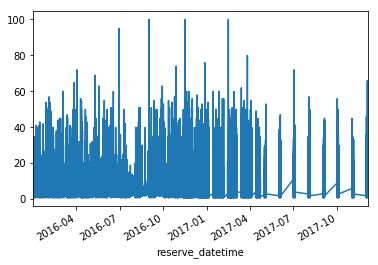

In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('hotel.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

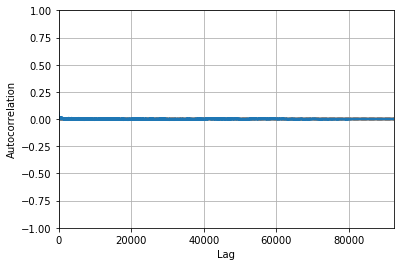

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('hotel.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

C:\Users\ningesh\Anaconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ningesh\Anaconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:     D.reserve_visitors   No. Observations:                92377
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -283805.761
Method:                       css-mle   S.D. of innovations              5.224
Date:                Mon, 02 Mar 2020   AIC                         567625.522
Time:                        12:37:45   BIC                         567691.557
Sample:                             1   HQIC                        567645.633
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.204e-05      0.005      0.006      0.995      -0.010       0.010
ar.L1.D.reserve_visitors    -0.8024      0.003   -247.160      0.000      -0.809      -0.

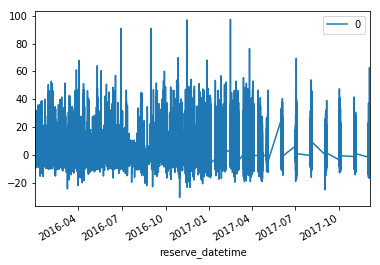

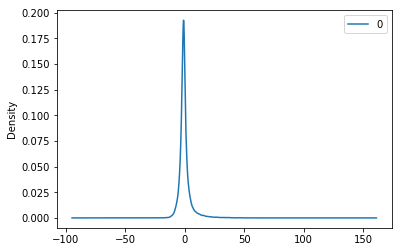

                  0
count  92377.000000
mean       0.000043
std        5.224288
min      -30.727518
25%       -2.199432
50%       -0.797456
75%        0.893851
max       97.314923


In [6]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('hotel.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('hotel.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=4.524437, expected=9.000000
predicted=5.316983, expected=2.000000
predicted=5.064817, expected=2.000000
predicted=4.511066, expected=2.000000
predicted=4.385332, expected=3.000000
predicted=3.568375, expected=2.000000
predicted=3.338883, expected=7.000000
predicted=3.167320, expected=2.000000
predicted=2.981066, expected=2.000000
predicted=2.967869, expected=3.000000
predicted=3.142807, expected=5.000000
predicted=3.504545, expected=2.000000
predicted=3.498195, expected=3.000000
predicted=2.847777, expected=9.000000
predicted=4.181969, expected=3.000000
predicted=4.131452, expected=7.000000
predicted=4.975067, expected=2.000000
predicted=4.222141, expected=2.000000
predicted=4.175372, expected=2.000000
predicted=4.095765, expected=2.000000
predicted=2.905018, expected=3.000000
predicted=3.039004, expected=7.000000
predicted=3.168462, expected=2.000000
predicted=2.990284, expected=3.000000
predicted=3.175934, expected=11.000000
predicted=4.892988, expected=2.000000
predicted=4

KeyboardInterrupt: 